In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [ ]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cooma
Processing Record 2 of Set 1 | yamada
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | opuwo
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | dunedin
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | seryshevo
Processing Record 12 of Set 1 | singaraja
Processing Record 13 of Set 1 | lazaro cardenas
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | tirmiz
Processing Record 18 of Set 1 | valle de la pascua
Processing Record 19 of Set 1 | north platte
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | emporia
Processing Record 22 of Set 1 | utrik

Processing Record 40 of Set 4 | ljusdal
Processing Record 41 of Set 4 | bulgan
Processing Record 42 of Set 4 | otwock
Processing Record 43 of Set 4 | kourou
Processing Record 44 of Set 4 | monster
Processing Record 45 of Set 4 | coquimbo
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | nemuro
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | naracoorte
Processing Record 0 of Set 5 | olonkinbyen
Processing Record 1 of Set 5 | aklera


In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


In [5]:
# Display sample data
city_data_df['Max Temp'] = (city_data_df['Max Temp'] - 273.15) * 9/5 + 32
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inarajan village,13.2736,144.7484,88.772,85,67,7.81,GU,1698041564
1,port mathurin,-19.6833,63.4167,76.640,78,7,5.65,MU,1698041564
2,qoryooley,1.7878,44.5300,85.820,57,18,4.16,SO,1698041565
3,yelwa,8.8333,9.6333,75.956,69,100,1.96,NG,1698041565
4,punta arenas,-53.1500,-70.9167,37.508,87,40,2.06,CL,1698041565


In [6]:
# Read saved data
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inarajan village,13.2736,144.7484,88.772,85,67,7.81,GU,1698041564
1,port mathurin,-19.6833,63.4167,76.640,78,7,5.65,MU,1698041564
2,qoryooley,1.7878,44.5300,85.820,57,18,4.16,SO,1698041565
3,yelwa,8.8333,9.6333,75.956,69,100,1.96,NG,1698041565
4,punta arenas,-53.1500,-70.9167,37.508,87,40,2.06,CL,1698041565


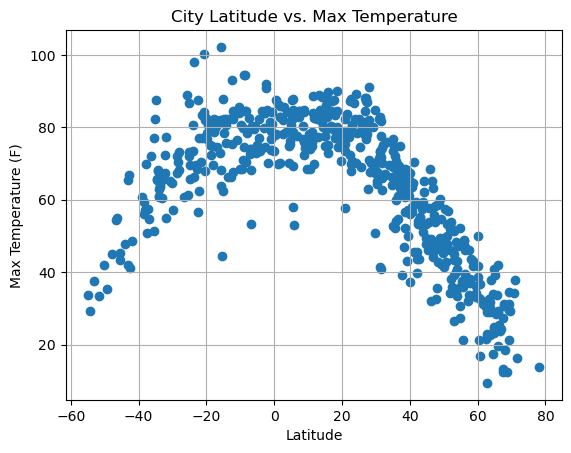

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


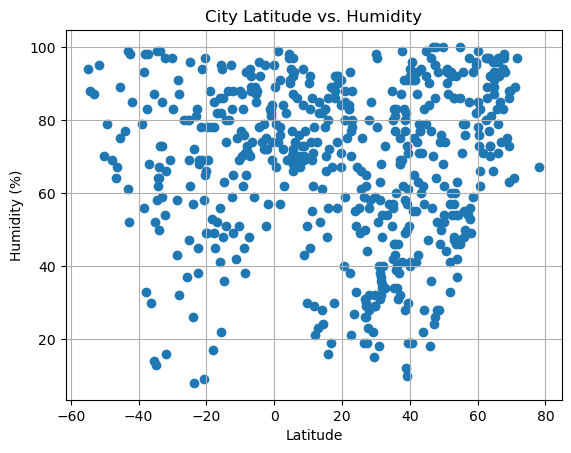

In [8]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


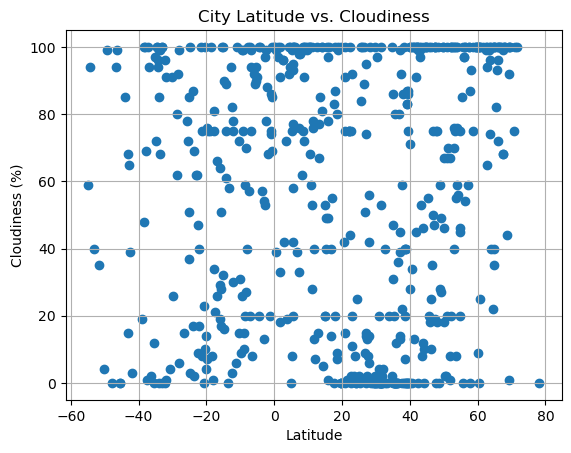

In [9]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


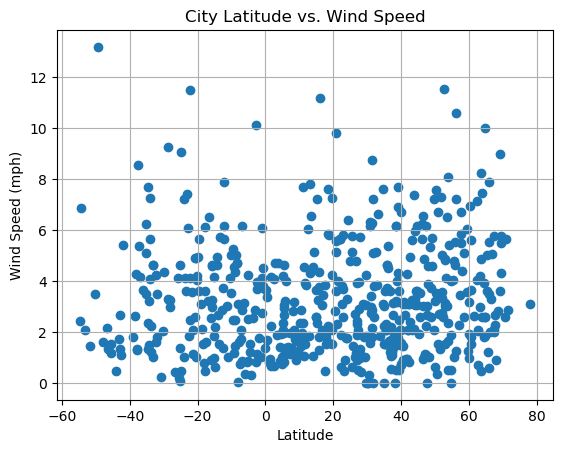

In [10]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


In [11]:
def create_linear_regression_plot(x_values, y_values, title, x_label, y_label, filename):
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Annotate the text for the line equation
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

In [12]:
# Create a DataFrame with the Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,inarajan village,13.2736,144.7484,88.772,85,67,7.81,GU,1698041564
2,qoryooley,1.7878,44.5300,85.820,57,18,4.16,SO,1698041565
3,yelwa,8.8333,9.6333,75.956,69,100,1.96,NG,1698041565
6,lihue,21.9789,-159.3672,78.044,83,75,5.66,US,1698041565
7,yellowknife,62.4560,-114.3525,21.416,97,100,4.02,CA,1698041304


In [13]:
 # Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
(southern_hemi_df.head())


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,port mathurin,-19.6833,63.4167,76.640,78,7,5.65,MU,1698041564
4,punta arenas,-53.1500,-70.9167,37.508,87,40,2.06,CL,1698041565
5,port-aux-francais,-49.3500,70.2167,35.402,79,99,13.18,TF,1698041565
14,alofi,-19.0595,-169.9187,75.092,88,75,3.09,NU,1698041567
20,luderitz,-26.6481,15.1594,60.782,80,15,0.43,NA,1698041568


R value (Correlation Coefficient): -0.8831640404607065


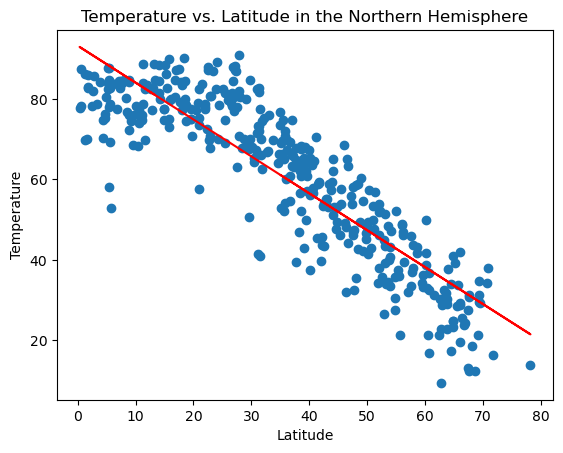

In [14]:
# Linear regression on Northern Hemisphere
#create a DataFrame for the Northern Hemisphere (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Print the results
print(f"R value (Correlation Coefficient): {r_value}")

# Plot the data along with the fitted line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], intercept + slope*northern_hemi_df['Lat'], 'r', label='fitted line')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature vs. Latitude in the Northern Hemisphere')
plt.show()

Slope: 0.6850097755259119
Intercept: 85.85740521355362
R value (Correlation Coefficient): 0.6985238495633108
R-squared: 0.48793556840874686


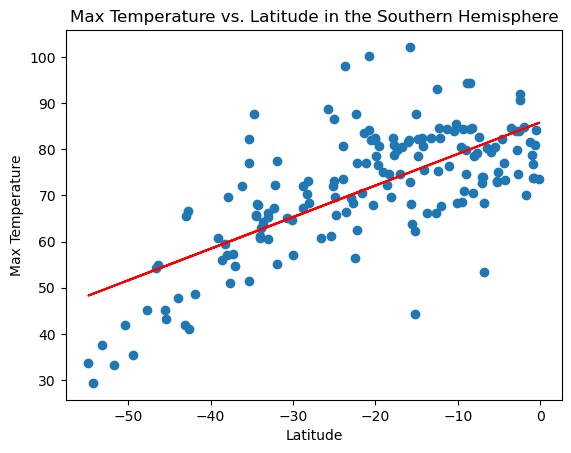

In [15]:
# Create a DataFrame for the Southern Hemisphere (lat < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R value (Correlation Coefficient): {r_value}")
print(f"R-squared: {r_value**2}")

# Plot the data along with the fitted line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], intercept + slope*southern_hemi_df['Lat'], 'r', label='fitted line')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Max Temperature vs. Latitude in the Southern Hemisphere')
plt.show()


In [ ]:
# As the latitude gets closer to 0, the max temperatures start to increase.

Slope: 0.12791877560736767
Intercept: 62.045200327734754
R value (Correlation Coefficient): 0.10821621328121458
R-squared: 0.011710748816925324


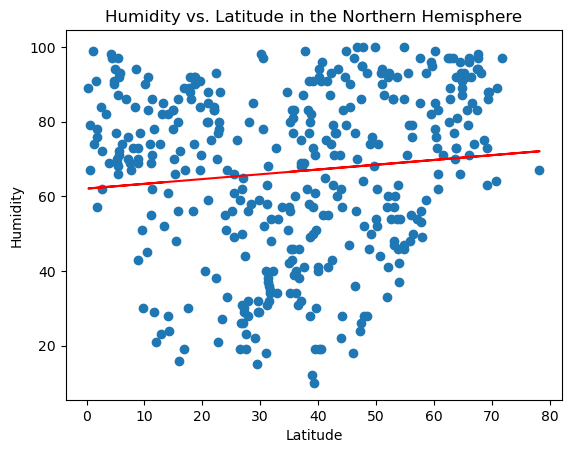

In [16]:
#Create a DataFrame for the Northern Hemisphere (Lat >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R value (Correlation Coefficient): {r_value}")
print(f"R-squared: {r_value**2}")

# Plot the data along with the fitted line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], intercept + slope*northern_hemi_df['Lat'], 'r', label='fitted line')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in the Northern Hemisphere')
plt.show()


Slope: 0.0630357730168878
Intercept: 71.1451604668575
R value (Correlation Coefficient): 0.04220174192144055
R-squared: 0.0017809870212038728


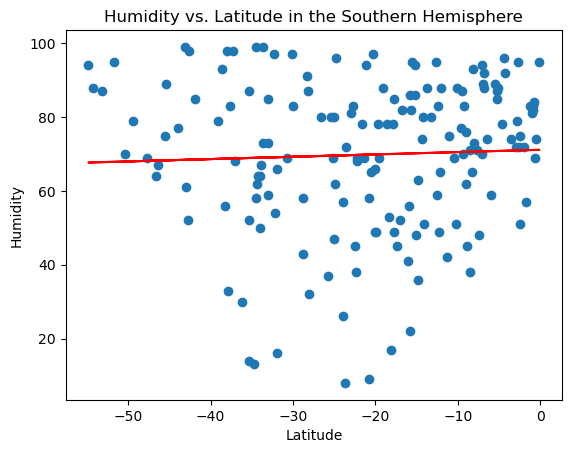

In [17]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R value (Correlation Coefficient): {r_value}")
print(f"R-squared: {r_value**2}")

# Plot the data along with the fitted line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], intercept + slope*southern_hemi_df['Lat'], 'r', label='fitted line')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in the Southern Hemisphere')
plt.show()


In [18]:
# The humidity remains steady as the latitude gets closer to 0.

Slope: 0.23148948986482545
Intercept: 48.31216232098965
R value (Correlation Coefficient): 0.11102684093348683
R-squared: 0.012326959407669787


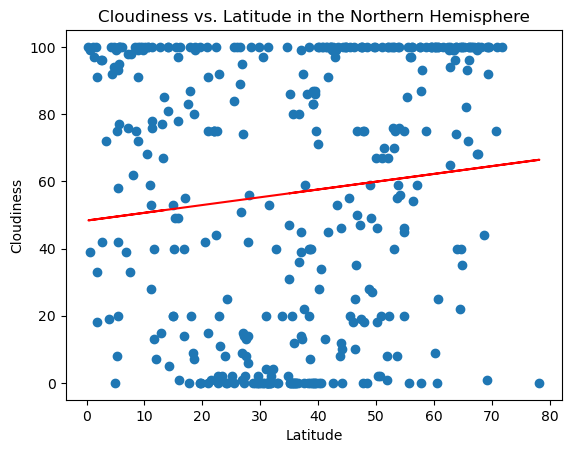

In [19]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R value (Correlation Coefficient): {r_value}")
print(f"R-squared: {r_value**2}")

# Plot the data along with the fitted line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], intercept + slope*northern_hemi_df['Lat'], 'r', label='fitted line')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude in the Northern Hemisphere')
plt.show()


Slope: 0.2667927805873567
Intercept: 61.9203013367663
R value (Correlation Coefficient): 0.10171354642228565
R-squared: 0.010345645525798459


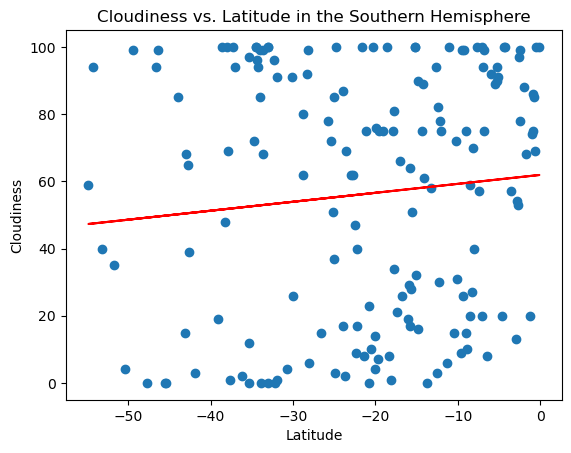

In [20]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R value (Correlation Coefficient): {r_value}")
print(f"R-squared: {r_value**2}")

# Plot the data along with the fitted line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], intercept + slope*southern_hemi_df['Lat'], 'r', label='fitted line')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude in the Southern Hemisphere')
plt.show()


In [21]:
# The cloudiness increases as the latitude getss closer to 0.

Slope: 0.018999159794844202
Intercept: 2.545362917218437
R value (Correlation Coefficient): 0.1715631572288501
R-squared: 0.02943391691833114


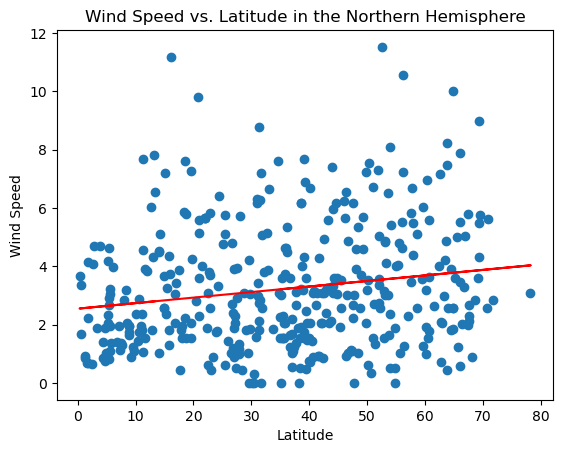

In [22]:
# Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R value (Correlation Coefficient): {r_value}")
print(f"R-squared: {r_value**2}")

# Plot the data along with the fitted line
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], intercept + slope*northern_hemi_df['Lat'], 'r', label='fitted line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude in the Northern Hemisphere')
plt.show()


Slope: -0.009608751357904035
Intercept: 3.0905271585402434
R value (Correlation Coefficient): -0.05865875329082617
R-squared: 0.00344084933763401


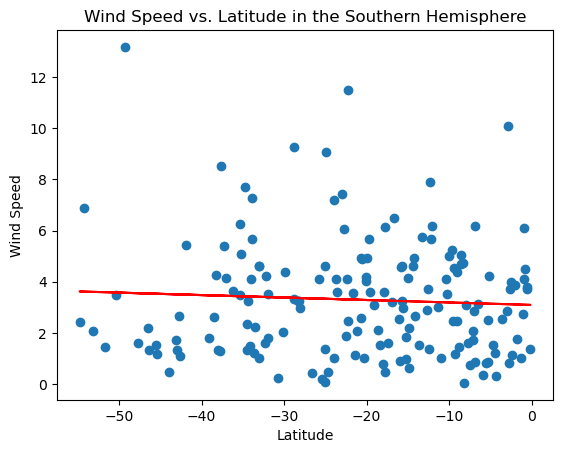

In [23]:
# Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R value (Correlation Coefficient): {r_value}")
print(f"R-squared: {r_value**2}")

# Plot the data along with the fitted line
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], intercept + slope*southern_hemi_df['Lat'], 'r', label='fitted line')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude in the Southern Hemisphere')
plt.show()


In [24]:
# The wind speeed decerases as the latitude gets closer to 0.